In [33]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

#sklearn.preprocessing.normalize
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

k=4
num_val_samples=len(train_data)//k #101
num_epochs=100
all_mae_histories =[]

'''a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print(np.concatenate([[[1, 2], [3, 4],[5, 6]]]))'''

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]])
  
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]])
  
  model=build_model()
  history=model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
 #val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [35]:
len(all_mae_histories)

4

In [0]:
#average of the per-epoch MAE scores for all folds
average_mae_history = [np.mean([x[i] for x in all_mae_histories])for i in range(num_epochs)]


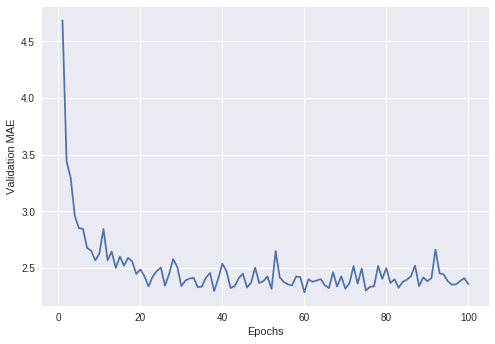

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9): 
  smoothed_points = [] 
  for point in points: 
    if smoothed_points: 
      previous = smoothed_points[-1] 
      smoothed_points.append(previous * factor + point * (1 - factor)) 
    else: 
      smoothed_points.append(point) 
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history) 
plt.xlabel('Epochs') 
plt.ylabel('Validation MAE') 
plt.show()


In [ ]:
h=[]
fac=0.9
t=[1,2,3,4,5,6,7,8,9]
for e in t:
  if h:
    pre=h[-1]
    print(pre)
    h.append(pre * fac + e * (1 - fac)) 
    print(pre)
  else:
    h.append(e)
print(h)
print(t[-1])
print(len(smooth_mae_history))

In [ ]:
#testing 
model=build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)



In [ ]:
test_mae_score